## **COMPUTER VISION ASSIGNMENT**

The given jpg file contains the images which have mixed rice grains of full rice grain and broken rice grain.

**Technology Used**

Computer Vision, OpenCv, WaterShed Algorithm, Image Preprocessing, Image Segmentation, and others.

## **FIND THE OBJECTIVES**

Objective 1: Count the number of rice grains in the Image. 

Objective 2: Find the number of broken grains in the image

## **DATASET**

Get the image file here: http://shorturl.at/zHJ07 

### **DATA SAMPLE:**

The background will always be blue. 

There will be a mix of broken and non-broken rice grains.

The grains will not overlap but can touch each other. 

## **STEPS INVOLVED TO SOLVE THE PROBLEM:**

**STEP 1: IMPORTING THE FOLLOWING LIBRARIES**  
      Open cv,skimage,matplotlib,numpy,scipy and warning

**STEP 2: DEFINING REQUIRED FUNCTION**   
      Defining custom "show" function for Image Visualization

**STEP 3: IMAGE PRE-PROCESSING**  
      GrayScale Conversion

**STEP 4: IMAGE THERSHOLDING**  
      Morphological Transformations (Noise Removal)

**STEP 5: COUNTING RICE GRAINS USING THE CONTOURS METHOD**   
      Working over Clear image to get insight into grain touching problem

**STEP 6: APPLYING WATERSHED ALGORITHM (Solving grains touching problem)**   
      Applying Watershed Algorithm for Solving Touching rice grains problem

**STEP 7: COUNTING TOTAL RICE GRAINS AND BROKEN RICE GRAINS USING THE CONTOUR AREA** 
      For total rice grains counting: the Watershed method
      For broken rice grains counting: A filter of an average area of broken rice grain.  


**EXPLANATION:**

The main Idea behind solving the objectives(Counting rice grains) is to make the provided image in the best possible format.

If there would be clarity in the image, and rice grains are well separated from the background image then there would be ease in counting them.

Then, Solving the Corner cases and hence building the solution.

### There are 3 major and challenging parts in building solutions:

    Image Preprocessing
    Solving Grains touching problem
    Counting broken rice

## Image Preprocessing

Image preprocessing is one of the vital parts of the solution.

If the image is perfectly tuned as per the needs then it becomes easy to work further with the approaches.

As part of Solution, I have used:

  Conversion of BGR Image to Grayscale Image

  Image Thresholding
  
  And removing noise from the thresholded image using morphologyEx (Opening)
  
  After all the processes, the clear Image was ready for further use.

## Solving Grains touching Problem

After successfully Pre-processing the image, there comes the challenging part of the problem statement.

"Counting the rice grains that are touching each other"

It is not even easy for a human eye in the manual inspection process to count the rice grains. The small size and white colour creates illusion.

Well for Machines,
Counting Rice grains are quite easy if they are well separated. The reason is there are lots of algorithms out there and various techniques that can come in help.

But when there is an object touching or overlapping problem then there needs a lot of effort in grain classification.

In our case, it becomes more difficult as the rice grains are quite small size.

Because of its small in size, We can't apply processes like erosion to get the touching corner part separated.

So, For Solving this problem, I have applied the WaterShed Algorithm:

WaterShed Algorithm is based on extracting sure background and foreground and then using markers will make the watershed algorithm run and detect the exact boundaries.

It is like, filling the valleys and then separating hills out of that.

## Counting broken rice

After using the Watershed algorithm, We will get the total number of rice present in the image, but counting broken rice grains is one of the typical tasks.

I used an area-based approach, where I put a threshold after several trails and errors that helps in classifying the rice grains into two categories.

**Either Broken rice grain or Full rice grain**.

If the area of the Image is below the provided threshold then it is counted in the broken rice category.

Thus with this, we are done with the solutions of both of the objectives .



# **IMPORTING THE NECESSARY PACKAGES**

Importing all the necessary packages for the futhure use in solving the problem.

In [1]:
#Importing openCv both as cv2 and cv for better convinence 
import cv2  
import cv2 as cv 
import pandas as pd
# Importing numpy for working with numpy arrays
import numpy as np 

# Importing pyplot as plt from maplotlib for Image Visualization
from matplotlib import pyplot as plt 

#Collab not support cv2.imshow method thus, importing cv2.imshow method for better Image visualization 
from google.colab.patches import cv2_imshow  

#Importing PIL library for working with Images
from PIL import Image 

#Importing asarray method from numpy for dealing with pixels of Images
from numpy import asarray 

import matplotlib.image as mpimg

#Importing ndimage from scipy as this package contains various functions for multidimensional image processing.
from scipy import ndimage

#Importing filters, features, measures and color from skimage
from skimage import filters, feature, measure, color

#Importing Watershed for touching Grains sepration
from skimage.segmentation import watershed

#It ignores the warnings
import warnings
warnings.filterwarnings('ignore')

# **IMAGE 1:**

## **Defining show function for displaying  image with custom X and Y cordinates**


In [2]:
def show(image,x=30,y=7):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

## **Reading the image 1**

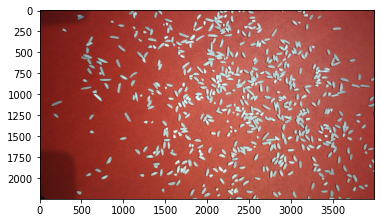

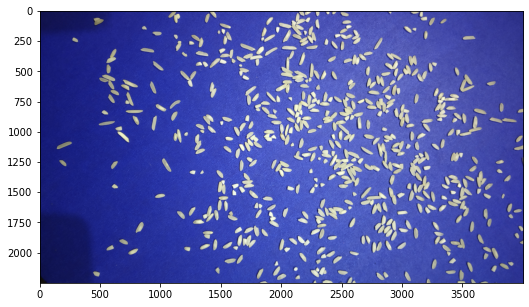

In [3]:
# Reading Image
img = cv2.imread("/content/image_1.jpg")
plt.imshow(img) # BGR format

# Using predefined show function for displaying the image
show(img,25,5) #RGB format

In [4]:
img.shape # (height, Width, channel)

(2250, 4000, 3)

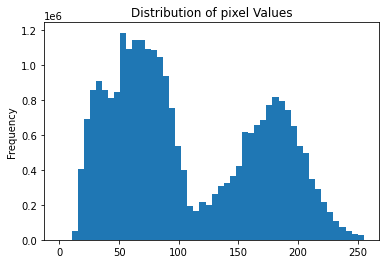

In [5]:
# pixel value range is 0 to 255. Typically zero is taken to be black, and 255 is taken to be white.
pd.Series(img.flatten()).plot(kind='hist', bins=50, title='Distribution of pixel Values')
plt.show()

## **IMAGE PREPROCESSING**

Image processing is most important to part of computer vision.
The aim of the image preprocessing is to improve the quality of the image to solve the problem statement in a better way.

### **Converting Image into Grayscale and then Image Thresholding**

**Here's what each parameter in the code does:**

* **grayscale_Image**: This is the input image in grayscale format.

* **120**: This is the threshold value. Any pixel value below this threshold will be set to 0 (black), 
     and any pixel value above the threshold will be set to 255 (white).

* **255**: This is the maximum value that a pixel can take after thresholding. In this case,
     pixels with values above the threshold are set to 255 (white).

* **cv2.THRESH_BINARY**: This is a binary thresholding operation 
     where pixel values below the threshold are set to 0 (black) and values above the threshold are set to 255 (white).

* **ret**: This is the threshold value that was used in the thresholding operation. 
     If a different value was used, the function will return that value.

* **thresh_img**: This is the output image after thresholding, 
     where pixels below the threshold are set to 0 (black) and pixels above the threshold are set to 255 (white).

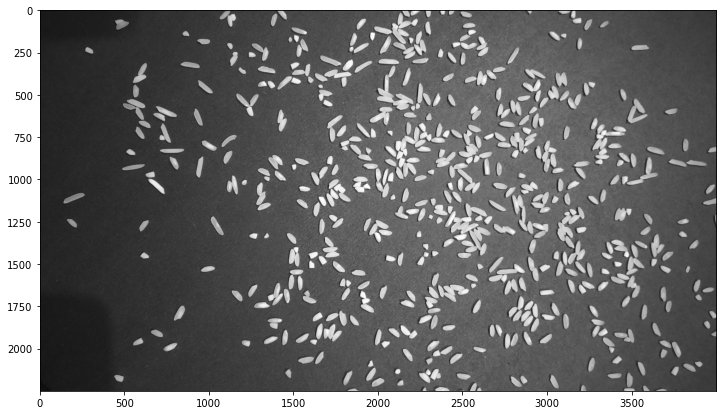

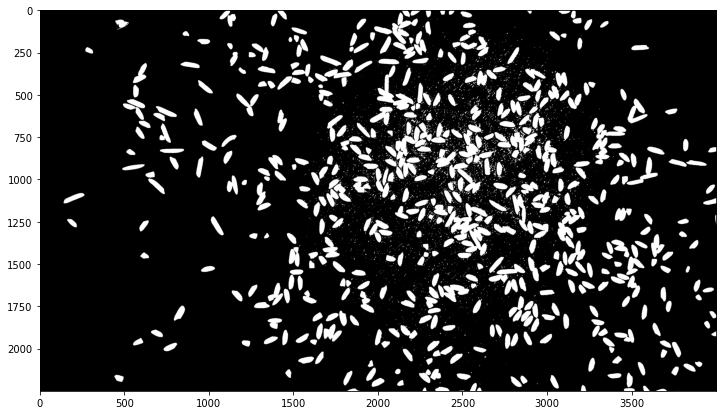

In [6]:
#Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(grayscale_Image)

ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img)

### **Noise Removal**

* To remove some noise from an image, the morphological function morphologyEx() can be Implemented.
* It is used to perform four operations like **dilation, erosion, opening, and closing.**

* Since the goal here is to remove the white distorted object in the image. Here, **opening operation** (erosion followed by dilation) is going to be in use.

* In this case, we will use four iterations iterations=8 (to suppress larger noise areas we will use more iterations)



* **cv2.MORPH_OPEN** : it is morphological opening operation which is a combination of erosion followed by dilation.This operation is used to remove small objects from the foreground (i.e., white regions) of the binary image.

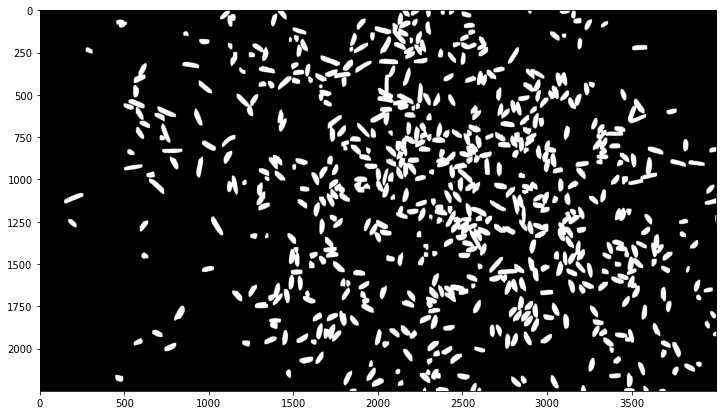

In [7]:
# Noise removal
# kernel can be adjusted to control the degree of smoothing or object removal in the output image.

kernel = np.ones((3),np.uint8) # This creates a 3x3 kernel matrix of ones with data type uint8. 
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

Image pre-processing is done now, and its time to apply the Grain counting algorithm.



## **Counting rice grains using Contours method**

Applying Opencv Contour method for counting the total number of rice grains avilable in the image.

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

Here's what each parameter in the code does:

* **clear_image:** This is the binary image in which contours will be found.
* **cv.RETR_TREE:** This is the retrieval mode of the contours. cv.RETR_TREE retrieves all of the contours and reconstructs a full hierarchy of nested contours. This mode retrieves all of the contours and their hierarchical relationships, which is useful if you want to find the parent-child relationships between different contours.
* **cv.CHAIN_APPROX_SIMPLE:** This is the contour approximation method.
* **cv.CHAIN_APPROX_SIMPLE** compresses horizontal, vertical, and diagonal segments and leaves only their end points, which is useful for contour storage, transmission, and processing. This mode stores only the endpoints of the contours rather than all the points on the contour.
   

The output of this code are the **contours** and their **hierarchy**, which are stored in two variables: contours and hierarchy. 
 - The **contours variable** contains a list of all the contours found in the image, and each contour is represented as a numpy array of (x, y) coordinates. 
 - The **hierarchy variable** contains information about the hierarchical relationships between contours, such as the parent, child, and sibling contours.

* **cv.COLOR_GRAY2BGR**: This is a color conversion code that converts the binary image into a color image with three channels (BGR) so that the contours can be drawn in color.
* **output_contour**: This is the output color image in which the contours will be drawn.
* **contours**: This is the list of contours detected in the clear_image binary image.
* **-1**: This parameter specifies that all the contours should be drawn. If a positive integer is used, only the contour with the corresponding index in the contours list will be drawn.
* **(0, 0, 255)**: This is the color of the contours in the BGR format. In this case, the contours will be drawn in red because the blue and green channels are set to zero and the red channel is set to 255.
* **2**: This is the thickness of the contour lines in pixels. In this case, the contour lines will have a thickness of 2 pixels.
* **len(contours)**: This prints the number of detected contours to the console.
The output of this code is an image with the detected contours drawn in red and the number of detected contours printed to the console.

In [8]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 513


Number of detected contours 513


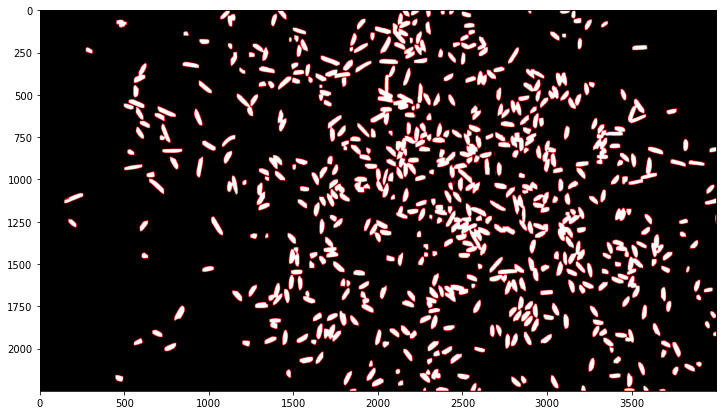

In [9]:
print("Number of detected contours", len(contours))
show(output_contour)

Number of detected contours are 513, It denotes, total number of rice grain in the Image.

## **Applying Watershed Algorithm**
Fixing rice grains Touching problem with "WaterShed Algorithm"
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. 

This algorithm generally helps in detecting touching and overlapping objects in image.

**Here's what each parameter in the code does:**

* **ndimage**: This is the module in the SciPy library that contains functions for image processing.
* **distance_transform_edt**: This is a function in the ndimage module that computes the Euclidean distance transform of a binary image. The distance transform assigns to each pixel in the binary image the distance to the nearest pixel in the opposite class (i.e., black pixels for white objects, and white pixels for black objects).
   
The output of this code is a 2D array of the same shape as the input binary image, where each element represents the Euclidean distance of the corresponding pixel to the nearest pixel in the opposite class. The distance values are in pixels and are stored as floating-point numbers.

* **feature**: This is the module in the scikit-image library that contains functions for feature detection and extraction.
* **peak_local_max**: This is a function in the feature module that finds the local maxima in an image based on a specified minimum distance between peaks.
* **dist_trans**: This is the Euclidean distance transform of the binary image for which the local maxima will be found.
* **min_distance**: This is the minimum number of pixels separating the local maxima. Peaks that are closer to each other than this distance will be merged into a single peak.
  
The output of this code is an array of (x, y) coordinates of the local maxima in the distance transform. Each row in the array represents the coordinates of a local maximum.

* **np.zeros**: This is a NumPy function that creates a new array filled with zeros.
* **dist_trans.shape**: This is the shape of the distance transform array, which is used to determine the shape of the output mask.
* **dtype=bool**: This specifies the data type of the mask array as Boolean.
* **local_max.T**: This is a transpose of the local_max array, which swaps the x and y coordinates of the local maxima so that they can be used as indices for the mask array.
* **tuple**: This converts the transposed local_max array to a tuple so that it can be used to index the mask array.
* **True**: This sets the elements of the mask array at the (x, y) coordinates of the local maxima to True.


The output of this code is a binary mask image of the same shape as the distance transform array, where the elements corresponding to the local maxima are set to True and all other elements are set to False.

* -**dist_trans**: This is the negative of the Euclidean distance transform of the binary image, which is used as the input to the watershed algorithm. Taking the negative ensures that the markers are located at the minima in the distance transform, which is necessary for the watershed algorithm to work properly.
* **measure.label**: This is a function in the skimage.measure module that labels connected components in a binary image. The local_max_mask array, which contains the locations of the local maxima in the distance transform, is passed to this function to assign a unique label to each local maximum.
* **mask**: This is the binary image used to mask the watershed algorithm. Only the pixels in the mask that are labeled as foreground (i.e., white) are considered for segmentation by the watershed algorithm.


The output of this code is a 2D array of the same shape as the input binary image, where each element represents the label of the region to which the corresponding pixel belongs. The labels are integers starting from 1, where each label corresponds to a separate region of the image. Pixels that were not segmented by the watershed algorithm are assigned a label of 0.





In [10]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.

#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

### **Counting Total Grains and Broken grains using grains area**

* **color.label2rgb**: This is a function in the skimage.color module that converts a labeled image into a color image, where each label is assigned a unique color. 
* The **labels** array, which contains the segmentation results from the watershed algorithm, is passed to this function.
* **bg_label**: This specifies the label of the background region in the labels array. Pixels with this label will be colored black in the output image.


The output of this code is a color-coded image that displays the segmentation results from the watershed algorithm, where each segmented region is assigned a unique color. The background region is colored black.

Number of Rice grains are : 586


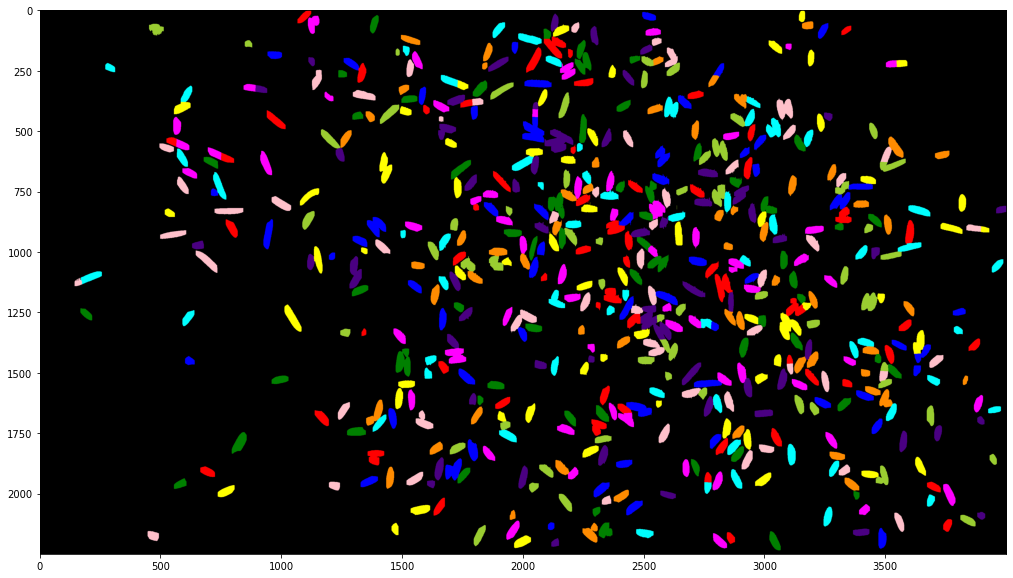

In [11]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

## **Results of WaterShed Algorithm**
The results are quite better after applying the Watershed algorithm. Most of the touching rice grains are well seperated now and counting is more accurate.

In the above results, there is the total counting of 513 and here, the count is of 586.

It means, there is total gap of 73 grains.

Well, the results are not 100% accurate but it is feasible in respect of Simple countous counting.

**Counting Broken Rice**

In [12]:
#Creating A list name count for counting the total Broken rice grains
count = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(count))

Total number of broken rice present in the Image is:  87


# **Applying for all the Images**

## **Creating Overall function**

In [13]:
def count_rice(img):
  
  #Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
  grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

  # Noise removal
  # kernel can be adjusted to control the degree of smoothing or object removal in the output image.
  kernel = np.ones((3),np.uint8)
  clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

  #Applying Countours method to get the count of rice grains
  contours, hierarchy = cv.findContours(clear_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

  #To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.

  #Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
  dist_trans = ndimage.distance_transform_edt(clear_image)

  #Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
  local_max = feature.peak_local_max(dist_trans, min_distance=23)


  local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
  local_max_mask[tuple(local_max.T)] = True

  #Aplying Watershed algorithm
  labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

  #Creating A list name count for counting the total Broken rice grains
  count = []

  #Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
  for x in contours:

    #Using contourArea method to get the area of rice (Contour)
    area = cv.contourArea(x)
    if area < 800 :
      count.append(x)

  return labels.max(),len(count)


## **Creating a empty Dataframe**

In [14]:
df = pd.DataFrame(columns=['file_name','total_rice_grain','total_broken_rice_grain'])
df

,file_name,total_rice_grain,total_broken_rice_grain


## **Image_1**

In [15]:
# Image_1
img = cv2.imread("/content/image_1.jpg")
total_rice_grain,total_broken_rice_grain = count_rice(img)

df.loc[len(df.index)] = ['image_1', total_rice_grain, total_broken_rice_grain]

## **Image_2**

In [16]:
# Image_2
img = cv2.imread("/content/image_2.jpg")
total_rice_grain,total_broken_rice_grain = count_rice(img)

df.loc[len(df.index)] = ['image_2', total_rice_grain, total_broken_rice_grain]

## **Image_3**

In [17]:
# Image_3
img = cv2.imread("/content/image_3.jpg")
total_rice_grain,total_broken_rice_grain = count_rice(img)

df.loc[len(df.index)] = ['image_3', total_rice_grain, total_broken_rice_grain]

## **Image_4**

In [18]:
# Image_4
img = cv2.imread("/content/image_4.jpg")
total_rice_grain,total_broken_rice_grain = count_rice(img)

df.loc[len(df.index)] = ['image_4', total_rice_grain, total_broken_rice_grain]

## **Image_5**

In [19]:
# Image_5
img = cv2.imread("/content/image_5.jpg")
total_rice_grain,total_broken_rice_grain = count_rice(img)

df.loc[len(df.index)] = ['image_5', total_rice_grain, total_broken_rice_grain]

## **Final dataframe**


In [20]:
df.to_csv('Submission_File.csv')
df

,file_name,total_rice_grain,total_broken_rice_grain
0,image_1,586,87
1,image_2,602,135
2,image_3,618,246
3,image_4,695,187
4,image_5,704,70
